In [5]:
# Dataset: 
# Nhanes 2007-2008: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2007
# Nhanes 2009-2010: https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2009

In [131]:
from __future__ import absolute_import
from __future__ import print_function

import os
import sys
import optparse
import subprocess
import random

import sqlite3

import csv

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

# import scipy

In [7]:
conn = sqlite3.connect('database.db')
conn.text_factory = str
c = conn.cursor()

In [8]:
c.execute("DROP TABLE IF EXISTS basic_information")
conn.commit()
c.execute('''CREATE TABLE basic_information(
  SEQN int,
  RIAGENDR integer
)''')

c.execute("CREATE INDEX seqn_info on basic_information (SEQN)")

In [9]:
files = ["data/2007-2008/DEMO_E.csv", "data/2009-2010/DEMO_F.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
          csv_reader = csv.DictReader(csv_file)
          for row in csv_reader:
             c.execute("SELECT SEQN FROM basic_information WHERE SEQN = '" +row["SEQN"] + "'")
             if c.fetchone() == None:
                c.execute("INSERT INTO basic_information(SEQN, RIAGENDR) VALUES(?, ?)", (row["SEQN"], row["RIAGENDR"]))
conn.commit()

In [10]:
c.execute("DROP TABLE IF EXISTS bowel_health")
conn.commit()
c.execute('''CREATE TABLE bowel_health(
  SEQN int, 
  BHQ010 integer,
  BHQ010_b integer DEFAULT 0, 
  BHQ020 integer,
  BHQ020_b integer DEFAULT 0, 
  BHQ030 integer,
  BHQ030_b integer DEFAULT 0, 
  BHQ040 integer,
  BHQ040_b integer DEFAULT 0, 
  BHD050 integer,
  BHD050_b integer DEFAULT 0
)''')

c.execute("CREATE INDEX seqn_bowel on bowel_health (SEQN)")

In [11]:
files = ["data/2007-2008/BHQ_E.csv", "data/2009-2010/BHQ_F.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("SELECT SEQN FROM bowel_health WHERE SEQN = '" +row["SEQN"] + "'")
         if c.fetchone() == None:
            c.execute("INSERT INTO bowel_health (SEQN, BHQ010, BHQ020, BHQ030, BHQ040, BHD050) VALUES(?, ?, ?, ?, ?, ?)", (
                row["SEQN"], row["BHQ010"], row["BHQ020"], row["BHQ030"],
                row["BHQ040"], row["BHD050"]))
conn.commit()

In [12]:
c.execute("UPDATE bowel_health SET BHQ010_b = 1 WHERE BHQ010 BETWEEN 1 AND 5")
c.execute("UPDATE bowel_health SET BHQ020_b = 1 WHERE BHQ020 BETWEEN 1 AND 5")
c.execute("UPDATE bowel_health SET BHQ030_b = 1 WHERE BHQ030 BETWEEN 1 AND 5")
c.execute("UPDATE bowel_health SET BHQ040_b = 1 WHERE BHQ040 BETWEEN 1 AND 5")
c.execute("UPDATE bowel_health SET BHD050_b = 1 WHERE BHD050 BETWEEN 1 AND 63")

In [13]:
c.execute("DROP TABLE IF EXISTS nutrition")
conn.commit()
c.execute('''CREATE TABLE IF NOT EXISTS nutrition(
      SEQN integer, 
      DBQ010 integer, 
      DBQ010_b integer DEFAULT 0,
      DBD030 integer, 
      DBD030_b integer DEFAULT 0,
      DBQ700 integer, 
      DBQ700_b integer DEFAULT 0,
      DBQ197 integer, 
      DBQ197_b integer DEFAULT 0,
      DBQ229 integer, 
      DBQ229_b integer DEFAULT 0,
      DBQ235A integer, 
      DBQ235A_b integer DEFAULT 0,
      DBQ235B integer, 
      DBQ235B_b integer DEFAULT 0,
      DBQ235C integer,
      DBQ235C_b integer DEFAULT 0,
      DBQ424  integer, 
      DBQ424_b integer DEFAULT 0,
      DBD895 integer, 
      DBD895_b integer DEFAULT 0,
      DBD900 integer, 
      DBD900_b integer DEFAULT 0,
      DBD905 integer, 
      DBD905_b integer DEFAULT 0,
      DBD910 integer, 
      DBD910_b integer DEFAULT 0,
      DBQ915 integer, 
      DBQ915_b integer DEFAULT 0,
      DBQ920 integer, 
      DBQ920_b integer DEFAULT 0,
      DBQ925A integer, 
      DBQ925A_b integer DEFAULT 0,
      DBQ925B integer, 
      DBQ925B_b integer DEFAULT 0,
      DBQ925C integer, 
      DBQ925C_b integer DEFAULT 0,
      DBQ925D integer, 
      DBQ925D_b integer DEFAULT 0,
      DBQ925E integer, 
      DBQ925E_b integer DEFAULT 0,
      DBQ925F integer, 
      DBQ925F_b integer DEFAULT 0,
      DBQ925G integer, 
      DBQ925G_b integer DEFAULT 0,
      DBQ925H integer,
      DBQ925H_b integer DEFAULT 0,
      DBQ925I integer, 
      DBQ925I_b integer DEFAULT 0,
      DBQ925J integer, 
      DBQ925J_b integer DEFAULT 0
   )''')

c.execute("CREATE INDEX seqn_nutrition on nutrition (SEQN)")

In [14]:
files = ["data/2007-2008/DBQ_E.csv", "data/2009-2010/DBQ_F.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
          csv_reader = csv.DictReader(csv_file)
          for row in csv_reader:
             c.execute("SELECT SEQN FROM nutrition WHERE SEQN = '" +row["SEQN"] + "'")
             if c.fetchone() == None:
                c.execute("INSERT INTO nutrition (SEQN, DBQ010, DBD030, DBQ700, DBQ197, DBQ229, DBQ235A, DBQ235B, DBQ235C, DBQ424, DBD895, DBD900, DBD905, DBD910, DBQ915, DBQ920, DBQ925A, DBQ925B, DBQ925C, DBQ925D, DBQ925E, DBQ925F, DBQ925G, DBQ925H, DBQ925I, DBQ925J) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (
                    row["SEQN"],   row["DBQ010"], row["DBD030"],  row["DBQ700"],
                    row["DBQ197"], row["DBQ229"], row["DBQ235A"],
                    row["DBQ235B"], row["DBQ235C"], row["DBQ424"], row["DBD895"], row["DBD900"],
                    row["DBD905"], row["DBD910"], row["DBQ915"], row["DBQ920"], row["DBQ925A"], row["DBQ925B"],
                    row["DBQ925C"], row["DBQ925D"], row["DBQ925E"], row["DBQ925F"], row["DBQ925G"], row["DBQ925H"],
                    row["DBQ925I"], row["DBQ925J"]))
conn.commit()

In [15]:
c.execute("UPDATE nutrition SET DBQ010_b = 1 WHERE DBQ010 = 2")
c.execute("UPDATE nutrition SET DBQ700_b = 1 WHERE DBQ700 > 3")
c.execute("UPDATE nutrition SET DBQ197_b = 1 WHERE DBQ197 > 1")
c.execute("UPDATE nutrition SET DBQ229_b = 1 WHERE DBQ229 < 7")
c.execute("UPDATE nutrition SET DBQ235A_b = 1 WHERE DBQ235A < 7")
c.execute("UPDATE nutrition SET DBD895_b = 1 WHERE DBD895 BETWEEN 1 AND 21")
c.execute("UPDATE nutrition SET DBD900_b = 1 WHERE DBD900 BETWEEN 1 AND 5555")
c.execute("UPDATE nutrition SET DBD905_b = 1 WHERE DBD905 BETWEEN 1 AND 150")
c.execute("UPDATE nutrition SET DBD910_b = 1 WHERE DBD910 BETWEEN 1 AND 180")
c.execute("UPDATE nutrition SET DBQ920_b = 1 WHERE DBQ920 IN (1)")
c.execute("UPDATE nutrition SET DBQ925A_b = 1 WHERE DBQ925A IN (10)")
c.execute("UPDATE nutrition SET DBQ925B_b = 1 WHERE DBQ925B IN (11)")
c.execute("UPDATE nutrition SET DBQ925C_b = 1 WHERE DBQ925C IN (12)")
c.execute("UPDATE nutrition SET DBQ925D_b = 1 WHERE DBQ925D IN (13)")
c.execute("UPDATE nutrition SET DBQ925E_b = 1 WHERE DBQ925E IN (14)")
c.execute("UPDATE nutrition SET DBQ925F_b = 1 WHERE DBQ925F IN (15)")
c.execute("UPDATE nutrition SET DBQ925G_b = 1 WHERE DBQ925G IN (16)")
c.execute("UPDATE nutrition SET DBQ925H_b = 1 WHERE DBQ925H IN (17)")
c.execute("UPDATE nutrition SET DBQ925I_b = 1 WHERE DBQ925I IN (18)")
c.execute("UPDATE nutrition SET DBQ925J_b = 1 WHERE DBQ925J IN (19)")

In [16]:
c.execute("DROP TABLE IF EXISTS health_status")
conn.commit()
c.execute('''CREATE TABLE IF NOT EXISTS health_status(
     SEQN integer,
     HSQ470 integer,
     HSQ470_b integer DEFAULT 0,
     HSQ480 integer,
     HSQ480_b integer DEFAULT 0,
     HSQ490 integer,
     HSQ490_b integer DEFAULT 0,
     HSQ493 integer,
     HSQ493_b integer DEFAULT 0,
     HSQ496 integer,
     HSQ496_b integer DEFAULT 0,
     HSQ500 integer,
     HSQ500_b integer DEFAULT 0,
     HSQ510 integer,
     HSQ510_b integer DEFAULT 0)''')

c.execute("CREATE INDEX seqn_health on health_status (SEQN)")

In [17]:
files = ["data/2007-2008/HSQ_E.csv", "data/2009-2010/HSQ_F.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("SELECT SEQN FROM health_status WHERE SEQN = '" +
                   row["SEQN"] + "'")
         if c.fetchone() == None:
            c.execute("INSERT INTO health_status(SEQN, HSQ470, HSQ480, HSQ490, HSQ493, HSQ496, HSQ500, HSQ510) VALUES(?, ?, ?, ?, ?, ?, ?, ?)", (row["SEQN"],
                  row["HSQ470"], row["HSQ480"], row["HSQ490"], row["HSQ493"], row["HSQ496"], row["HSQ500"], row["HSQ510"]))

conn.commit()

In [18]:
c.execute("UPDATE health_status SET HSQ470_b = 1 WHERE HSQ470 = 1")
c.execute("UPDATE health_status SET HSQ480_b = 1 WHERE HSQ480 BETWEEN 10 AND 30")
c.execute("UPDATE health_status SET HSQ490_b = 1 WHERE HSQ490 BETWEEN 10 AND 30")
c.execute("UPDATE health_status SET HSQ493_b = 1 WHERE HSQ493 BETWEEN 10 AND 30")
c.execute("UPDATE health_status SET HSQ496_b = 1 WHERE HSQ496 BETWEEN 10 AND 30")
c.execute("UPDATE health_status SET HSQ500_b = 1 WHERE HSQ500 = 1")
c.execute("UPDATE health_status SET HSQ510_b = 1 WHERE HSQ510 IN (1)")

In [19]:
c.execute("DROP TABLE IF EXISTS consumer_behavior")
conn.commit()
c.execute('''CREATE TABLE IF NOT EXISTS consumer_behavior(
  SEQN integer, 
  CBD010 integer, 
  CBD010_b integer DEFAULT 0,
  CBQ020 integer, 
  CBQ020_b integer DEFAULT 0,
  CBQ030 integer, 
  CBQ030_b integer DEFAULT 0,
  CBQ040 integer, 
  CBQ040_b integer DEFAULT 0,
  CBQ050 integer, 
  CBQ050_b integer DEFAULT 0,
  CBQ060 integer, 
  CBQ060_b integer DEFAULT 0
)''')

c.execute("CREATE INDEX seqn_consumer on consumer_behavior (SEQN)")

In [20]:
files = ["data/2007-2008/CBQ_E.csv", "data/2009-2010/CBQ_F.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("SELECT SEQN FROM consumer_behavior WHERE SEQN = '" +
                   row["SEQN"] + "'")
         if c.fetchone() == None:
            # print(row)
            c.execute("INSERT INTO consumer_behavior (SEQN, CBD010, CBQ020, CBQ030, CBQ040, CBQ050, CBQ060) VALUES (?, ?, ?, ?, ?, ?, ?)", (
                row["SEQN"],   row["CBD010"], row["CBQ020"], row["CBQ030"], row["CBQ040"],
                row["CBQ050"], row["CBQ060"]))
conn.commit()

In [21]:
c.execute("UPDATE consumer_behavior SET CBD010_b = 1 WHERE CBD010 = 1")
c.execute("UPDATE consumer_behavior SET CBQ020_b = 1 WHERE CBQ020 IN (4,5)")
c.execute("UPDATE consumer_behavior SET CBQ030_b = 1 WHERE CBQ030 IN (4,5)")
c.execute("UPDATE consumer_behavior SET CBQ040_b = 1 WHERE CBQ040 IN (1,2,3)")
c.execute("UPDATE consumer_behavior SET CBQ050_b = 1 WHERE CBQ050 IN (4,5)")
c.execute("UPDATE consumer_behavior SET CBQ060_b = 1 WHERE CBQ060 IN (1,2,3)")

In [22]:
c.execute("DROP TABLE IF EXISTS alcohol_use")
conn.commit()
c.execute('''CREATE TABLE alcohol_use(
  SEQN int,
  ALQ101 integer,
  ALQ101_b integer DEFAULT 0,
  ALQ110 integer,
  ALQ110_b integer DEFAULT 0,
  ALQ120Q integer,
  ALQ120Q_b integer DEFAULT 0,
  ALQ120U integer,
  ALQ120U_b integer DEFAULT 0,
  ALQ130 integer,
  ALQ130_b integer DEFAULT 0,
  ALQ140Q integer,
  ALQ140Q_b integer DEFAULT 0,
  ALQ140U integer,
  ALQ140U_b integer DEFAULT 0,
  ALQ150 integer,
  ALQ150_b integer DEFAULT 0
)''')

c.execute("CREATE INDEX seqn_alcohol on alcohol_use (SEQN)")

In [23]:
files = ["data/2007-2008/ALQ_E.csv", "data/2009-2010/ALQ_F.csv"]
for filename in files:
    with open(filename, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
         c.execute("SELECT SEQN FROM alcohol_use WHERE SEQN = '" + row["SEQN"] + "'")
         if c.fetchone() == None:

            c.execute("INSERT INTO alcohol_use (SEQN, ALQ101, ALQ110, ALQ120Q, ALQ120U, ALQ130 , ALQ140Q , ALQ140U , ALQ150) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?)", (
            row["SEQN"], row["ALQ101"], row["ALQ110"], row["ALQ120Q"], row["ALQ120U"], row["ALQ130"], row["ALQ140Q"], row["ALQ140U"], row["ALQ150"]))
    conn.commit()

In [24]:
c.execute("UPDATE alcohol_use SET ALQ101_b = 1 WHERE ALQ101 = 1")
c.execute("UPDATE alcohol_use SET ALQ120Q_b = 1 WHERE ALQ120Q BETWEEN 1 AND 366")
c.execute("UPDATE alcohol_use SET ALQ120U_b = 1 WHERE ALQ120U < 4")
c.execute("UPDATE alcohol_use SET ALQ130_b = 1 WHERE ALQ130 BETWEEN 1 AND 36")
c.execute("UPDATE alcohol_use SET ALQ140Q_b = 1 WHERE ALQ140Q BETWEEN 1 AND 304")
c.execute("UPDATE alcohol_use SET ALQ140U_b = 1 WHERE ALQ140U < 4")
c.execute("UPDATE alcohol_use SET ALQ150_b = 1 WHERE ALQ150 = 1")

In [25]:
c.execute("DROP TABLE IF EXISTS ferritin")
conn.commit()
c.execute('''CREATE TABLE ferritin(
  SEQN int,
  LBXFER integer,
  LBXFER_b integer DEFAULT 0
)''')

c.execute("CREATE INDEX seqn_ferritin on ferritin (SEQN)")

In [26]:
files = ["data/2007-2008/FERTIN_E.csv", "data/2009-2010/FERTIN_F.csv"]
for filename in files:   
   with open(filename, mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("SELECT SEQN FROM ferritin WHERE SEQN = '" +
                   row["SEQN"] + "'")
         if c.fetchone() == None:
            c.execute("INSERT INTO ferritin(SEQN, LBXFER) VALUES(?, ?)", (
               row["SEQN"], row["LBXFER"]))
   conn.commit()

In [27]:
#female 10-120 ng/ml
#male 20-250 ng/ml
c.execute("UPDATE ferritin SET LBXFER = 80 WHERE LBXFER = 'nan'")
conn.commit()
gender = "SELECT RIAGENDR from basic_information where basic_information.SEQN = ferritin.SEQN AND LBXFER != 'nan' AND ((RIAGENDR = 2 AND (LBXFER < 10 OR LBXFER > 120)) OR (RIAGENDR = 1 AND (LBXFER < 20 OR LBXFER > 250)))"
c.execute("UPDATE ferritin SET LBXFER_b = 1 WHERE EXISTS ("+gender+")")

In [28]:
c.execute("DROP TABLE IF EXISTS patients")
# # c.execute("CREATE TABLE patients as select * from consumer_behavior, bowel_health, alcohol_use where consumer_behavior.SEQN = bowel_health.SEQN")
bowel_health = "BHQ010_b, BHQ020_b, BHQ030_b, BHQ040_b, BHD050_b "
alcohol_use = "ALQ101_b, ALQ120Q_b, ALQ120U_b, ALQ130_b, ALQ140Q_b, ALQ140U_b, ALQ150_b "
consumer_behavior = "CBD010_b, CBQ020_b, CBQ030_b, CBQ040_b, CBQ050_b, CBQ060_b "
nutrition = "DBQ010_b, DBQ700_b, DBQ197_b, DBQ229_b, DBQ235A_b, DBD895_b, DBD900_b, DBD905_b, DBD910_b, DBQ920_b, DBQ925A_b, DBQ925B_b, DBQ925C_b, DBQ925D_b, DBQ925E_b, DBQ925F_b, DBQ925G_b, DBQ925H_b, DBQ925I_b, DBQ925J_b"

registers = bowel_health+","+alcohol_use+","+consumer_behavior+","+nutrition

#selecting patients with bowel disease
query = "CREATE TABLE patients AS SELECT bowel_health.SEQN as SEQN, "+registers + \
   " FROM consumer_behavior join bowel_health on bowel_health.SEQN = consumer_behavior.SEQN join nutrition on nutrition.SEQN = consumer_behavior.SEQN join alcohol_use on alcohol_use.SEQN = consumer_behavior.SEQN join health_status on health_status.SEQN = consumer_behavior.SEQN WHERE health_status.HSQ510_b = 1"

c.execute(query)
c.execute("ALTER TABLE patients ADD COLUMN bowel_profile text")
c.execute("ALTER TABLE patients ADD COLUMN alcohol_profile text")
c.execute("ALTER TABLE patients ADD COLUMN consumer_profile text")
c.execute("ALTER TABLE patients ADD COLUMN nutrition_profile text")
c.execute("CREATE INDEX seqn_patient on patients (SEQN)")

In [29]:
conn.row_factory = sqlite3.Row
pd.read_sql_query("SELECT * FROM patients", conn)

,SEQN,BHQ010_b,BHQ020_b,BHQ030_b,BHQ040_b,BHD050_b,ALQ101_b,ALQ120Q_b,ALQ120U_b,ALQ130_b,...,DBQ925E_b,DBQ925F_b,DBQ925G_b,DBQ925H_b,DBQ925I_b,DBQ925J_b,bowel_profile,alcohol_profile,consumer_profile,nutrition_profile
0,41496,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,None,None,None,None
1,41502,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,None,None,None,None
2,41528,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,None,None,None,None
3,41550,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,None,None,None,None
4,41574,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,None,None,None,None
5,41648,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,None,None,None,None
6,41666,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,None,None,None,None
7,41731,1,0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,None,None,None,None
8,41740,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,None,None,None,None
9,41775,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,None,None,None,None


In [30]:
str1 = bowel_health.replace(",", " ||")
str2 = alcohol_use.replace(",", " ||")
str3 = consumer_behavior.replace(",", " ||")
str4 = nutrition.replace(",", " ||")

query = "SELECT "+str1+" AS bowel_profile, "+str2 + " AS alcohol_profile, "+str3+" AS consumer_profile, "+str4+" AS nutrition_profile, SEQN FROM patients"
# print(query)
queries = []
for row in c.execute(query):
  sql = "UPDATE patients SET bowel_profile = '" + str(row[0])+"' , alcohol_profile = '"+str(
      row[1])+"' , consumer_profile = '"+str(row[2])+"' , nutrition_profile = '"+ str(row[3])+"' WHERE SEQN = '" + str(row[4]) + "'"
  queries.append(sql)

for sql in queries:
      c.execute(sql)
conn.commit()

In [31]:
view_name = "alcohol_and_bowel"
c.execute("DROP VIEW IF EXISTS "+view_name)

labels = "p.bowel_profile, p.alcohol_profile, p.consumer_profile, p.nutrition_profile"

view = "CREATE VIEW "+view_name+" AS SELECT count(*) AS nPatients, "+labels+" FROM patients p GROUP BY "
c.execute(view+" p.alcohol_profile, p.bowel_profile")

queries = []
q = "SELECT alcohol_profile, bowel_profile, nPatients FROM alcohol_and_bowel WHERE nPatients >= 1"
for row in c.execute(q):
  queries.append(row)
with open('q1.csv', mode='w') as result_file:
  result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for query in queries:
     result_writer.writerow(query)
conn.row_factory = sqlite3.Row
pd.read_sql_query(q, conn)

,alcohol_profile,bowel_profile,nPatients
0,0000000,00000,8
1,0000000,00001,76
2,0000000,00011,3
3,0000000,00101,7
4,0000000,00111,1
5,0000000,01001,1
6,0000000,10001,51
7,0000000,10011,5
8,0000000,10100,1
9,0000000,10101,11


In [32]:
view_name = "nutrition_and_bowel"
c.execute("DROP VIEW IF EXISTS "+view_name)

labels = "p.bowel_profile, p.alcohol_profile, p.consumer_profile, p.nutrition_profile"

view = "CREATE VIEW "+view_name + \
   " AS SELECT count(*) AS nPatients, "+labels+" FROM patients p GROUP BY "
c.execute(view+" p.nutrition_profile, p.bowel_profile")

queries = []
q = "SELECT nutrition_profile, bowel_profile, nPatients FROM nutrition_and_bowel WHERE nPatients >= 1"
for row in c.execute(q):
  queries.append(row)
with open('q2.csv', mode='w') as result_file:
  result_writer = csv.writer(
      result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for query in queries:
     result_writer.writerow(query)
conn.row_factory = sqlite3.Row
pd.read_sql_query(q, conn)

,nutrition_profile,bowel_profile,nPatients
0,00010000000000000000,00000,1
1,00010000000000000000,00001,5
2,00010000000000000000,00101,1
3,00010000000000000000,10001,4
4,00010000010000000001,00001,1
5,00010000010100000000,00001,1
6,00010000010100000000,11001,1
7,00010000010100000001,00001,1
8,00010000100000000000,10001,2
9,00010001100000000000,00001,1


In [33]:
view_name = "ferritin_"
c.execute("DROP VIEW IF EXISTS "+view_name)

labels = "p.bowel_profile, p.alcohol_profile, p.consumer_profile, p.nutrition_profile"

view = "CREATE VIEW "+view_name + \
   " AS SELECT count(DISTINCT p.SEQN) AS nPatients, LBXFER, "+labels + \
   " FROM patients p " + \
   " JOIN ferritin ON ferritin.SEQN = p.SEQN AND  ferritin.LBXFER_b = 1 GROUP BY "
c.execute(view+" p.nutrition_profile, p.bowel_profile")

queries = []
q = "SELECT nutrition_profile, bowel_profile, nPatients, LBXFER FROM ferritin_ WHERE nPatients >= 1"
for row in c.execute(q):
  queries.append(row)
with open('q5.csv', mode='w') as result_file:
  result_writer = csv.writer(
      result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for query in queries:
     result_writer.writerow(query)
conn.row_factory = sqlite3.Row
pd.read_sql_query(q, conn)

,nutrition_profile,bowel_profile,nPatients,LBXFER
0,00010001100000000000,00001,1,123
1,00010110000000000000,10001,1,405
2,00010110010000000001,10001,1,124
3,00010110100000000000,11001,1,400
4,00010111100000000000,00001,1,135
5,00011000000000000000,00001,1,331
6,00011100000000000000,10001,1,9
7,00011101010100000001,10001,1,9
8,00011111100000000000,11101,1,2
9,00111000000000000000,00001,1,6


In [34]:
view_name = "consumer_and_bowel"
c.execute("DROP VIEW IF EXISTS " + view_name)

labels = "p.bowel_profile, p.alcohol_profile, p.consumer_profile, p.nutrition_profile"

view = "CREATE VIEW "+view_name + \
   " AS SELECT count(*) AS nPatients, "+labels+" FROM patients p GROUP BY "
c.execute(view+" p.consumer_profile, p.bowel_profile")

queries = []
for row in c.execute("SELECT consumer_profile, bowel_profile, nPatients FROM consumer_and_bowel WHERE nPatients >= 1"):
  queries.append(row)
with open('q3.csv', mode='w') as result_file:
  result_writer = csv.writer(
      result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for query in queries:
     result_writer.writerow(query)
    
conn.row_factory = sqlite3.Row
pd.read_sql_query(q, conn)

,nutrition_profile,bowel_profile,nPatients,LBXFER
0,00010001100000000000,00001,1,123
1,00010110000000000000,10001,1,405
2,00010110010000000001,10001,1,124
3,00010110100000000000,11001,1,400
4,00010111100000000000,00001,1,135
5,00011000000000000000,00001,1,331
6,00011100000000000000,10001,1,9
7,00011101010100000001,10001,1,9
8,00011111100000000000,11101,1,2
9,00111000000000000000,00001,1,6


(-530749.4152117348, 549083.3099114734, -477196.0107189784, 505531.6751839275)

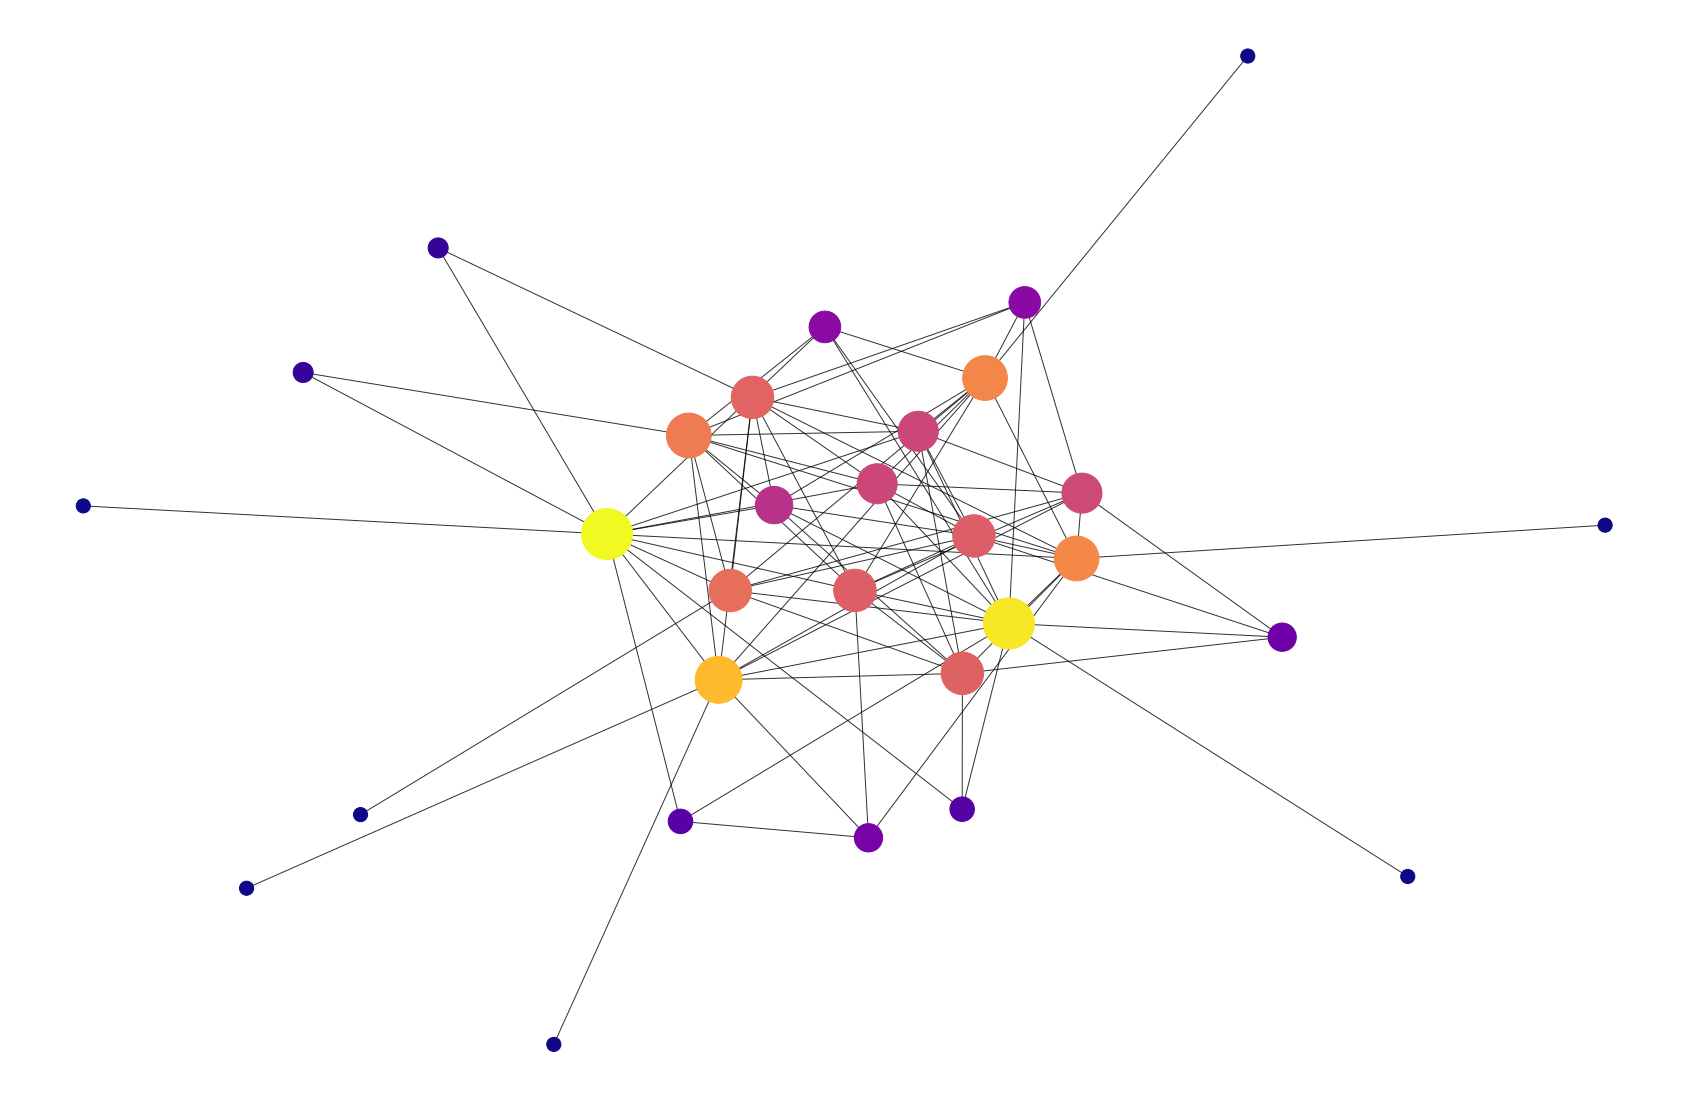

In [207]:
G = nx.Graph()

with open('q1.csv', mode='r') as edges: 
  for edge in edges:
     # print(edge)
     e = edge.split(",")
     G.add_edge(e[0],e[1])
# position is stored as node attribute data for random_geometric_graph
G = nx.convert_node_labels_to_integers(G)
# pos = nx.random_layout(G)
pos = nx.spring_layout(G,k=4, iterations=500, scale=500000,dim=2)

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
  x, y = pos[n]
  d = (x - 0.5)**2 + (y - 0.5)**2
  if d < dmin:
     ncenter = n
     dmin = d

# color by path length from node near center
p = dict(nx.pagerank(G))

plt.figure(figsize=(30, 20))
# node_color = [float(H.degree(v)) for v in H]
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.8, line_color='grey')
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                    node_size=[float(G.degree(v))*200 for v in G],
                    node_color=list(p.values()),
                    cmap='plasma')
plt.axis('Off')

In [35]:
view_name = "consumer_and_nutrition"
c.execute("DROP VIEW IF EXISTS "+view_name)

labels = "p.bowel_profile, p.alcohol_profile, p.consumer_profile, p.nutrition_profile"


view = "CREATE VIEW "+view_name + \
   " AS SELECT count(*) AS nPatients, "+labels+" FROM patients p GROUP BY "
c.execute(view+" p.consumer_profile, p.nutrition_profile")

queries = []
q = "SELECT consumer_profile, nutrition_profile, nPatients FROM consumer_and_nutrition WHERE nPatients >= 1"
for row in c.execute(q):
  queries.append(row)
with open('q4.csv', mode='w') as result_file:
  result_writer = csv.writer(
      result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  for query in queries:
     result_writer.writerow(query)
conn.row_factory = sqlite3.Row
pd.read_sql_query(q, conn)

,consumer_profile,nutrition_profile,nPatients
0,000000,00010110000000000000,2
1,000000,00110001000000000000,1
2,000000,00110110100000000000,1
3,000000,00111000000000000000,3
4,000000,00111001100000000000,2
5,000000,00111100000000000000,1
6,000000,00111100100000000000,1
7,000000,00111101000000000000,1
8,000000,00111110010010101001,1
9,000000,00111110100000000000,3


In [36]:
registers = "BHQ010_b, BHQ020_b, BHQ030_b, BHQ040_b, BHD050_b "

str1 = registers.replace(",", " ||")

cond1 = "bowel_health.BHQ010_b = 1 OR bowel_health.BHQ020_b = 1 OR bowel_health.BHQ030_b = 1 OR bowel_health.BHQ040_b = 1 OR bowel_health.BHD050_b = 1"
cond2 = "health_status.HSQ470_b = 1 OR health_status.HSQ496_b = 1 OR health_status.HSQ510_b = 1 OR health_status.HSQ490_b OR health_status.HSQ493_b = 1"
c.execute("DROP VIEW IF EXISTS bowel_profile")
c.execute("CREATE VIEW bowel_profile AS SELECT "+str1 +
         " AS profile, bowel_health.SEQN, HSQ510 FROM bowel_health JOIN health_status ON bowel_health.SEQN = health_status.SEQN WHERE ("+cond1+") AND ("+cond2+")")


query = "SELECT a.SEQN AS source, b.SEQN AS target, a.profile AS weight FROM bowel_profile a JOIN bowel_profile AS b ON a.profile = b.profile JOIN basic_information AS bi ON bi.SEQN = b.SEQN WHERE (a.SEQN < b.SEQN) AND (a.HSQ510 = 1 OR b.HSQ510 = 1 ) AND bi.RIAGENDR = 1"
queries = []

for row in c.execute(query):
  queries.append(row)
with open('bowel_correlation.csv', mode='w') as result_file:
  result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  result_writer.writerow(["SOURCE", "TARGET", "WEIGHT"])
  for query in queries:
     result_writer.writerow(query)

query = "SELECT a.SEQN AS node, a.HSQ510 FROM bowel_profile a"
queries = []

conn.row_factory = sqlite3.Row
pd.read_sql_query(query, conn)

for row in c.execute(query):
  queries.append(row)
with open('nodes.csv', mode='w') as result_file:
  result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  result_writer.writerow(["ID", "HAS"])
  for query in queries:
     result_writer.writerow(query)

conn.commit()



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc15712f278>],
      dtype=object)

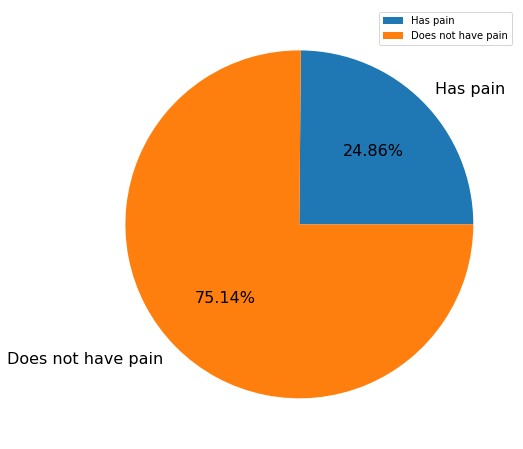

In [49]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1"
  
x = ["Has pain", "Does not have pain"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1570ee978>],
      dtype=object)

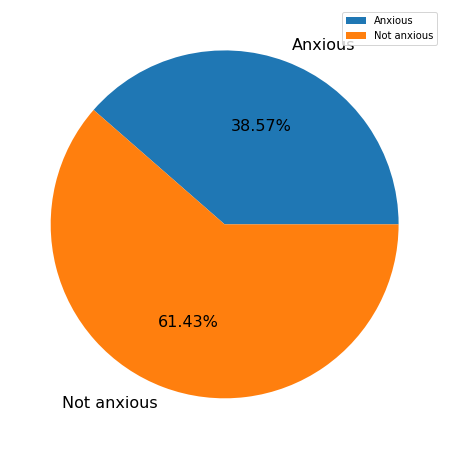

In [50]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 1"

x = ["Anxious", "Not anxious"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%',fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc157227860>],
      dtype=object)

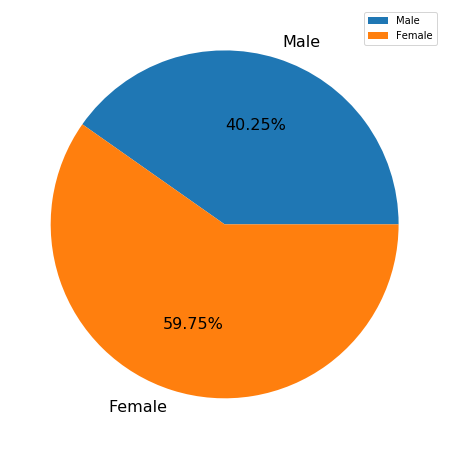

In [46]:
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 1"

x = ["Male", "Female"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 2"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)